Latar Belakang

Pernyataan Masalah

Perusahaan ingin mengetahui komposisi tingkat banyaknya penumpang dari setiap rute yang berelasi, yang dapat menjadi dasar dalam menentukan kapasitas roda transportasi transjakarta yang diperlukan pada setiap rute untuk mengakomodir penumpang sehingga dapat mengoptimalkan penggunaan tarnsportasi, hingga berdampak pada meningkatnya pendapatan perusahaan

In [41]:
import pandas as pd
import numpy as np
from google.colab import autoviz
import matplotlib.pyplot as plt
from glob import glob
from google.colab import data_table

data_table.enable_dataframe_formatter()

ds = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TransJakarta Passengers 2021.csv')

ds.dtypes

tahun                int64
bulan                int64
jenis               object
kode_trayek         object
trayek              object
jumlah_penumpang     int64
dtype: object

In [42]:
ds

,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang
0,2021,10,Mikrotrans,JAK.88,Terminal Tanjung Priok - Ancol Barat,31197
1,2021,10,Mikrotrans,JAK.85,Bintara - Cipinang Indah,30711
2,2021,10,Mikrotrans,JAK.84,Terminal Kampung Melayu - Kapin Raya,40186
3,2021,10,Mikrotrans,JAK.80,Rawa Buaya - Rawa Kompeni,61883
4,2021,10,Mikrotrans,JA.77,Tanjung Priok - Jembatan Item,66616
...,...,...,...,...,...,...
1468,2021,11,Angkutan Umum Integrasi,11Q,Kampung Melayu - Pulo Gebang via BKT,11353
1469,2021,11,Angkutan Umum Integrasi,11D,Pulo Gebang - Pulo Gadung 2 via PIK,59155
1470,2021,11,Angkutan Umum Integrasi,10K,Tanjung Priok - Senen via Taman BMW,34498
1471,2021,11,Angkutan Umum Integrasi,GR4,Taman Kota Intan - Museum Bahari,4


<ipython-input-43-99da73fb80ee>:14: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  legends = [f"{row[0]}: {row[1]:,.0f}" for row in grouped_jenis.iteritems()]


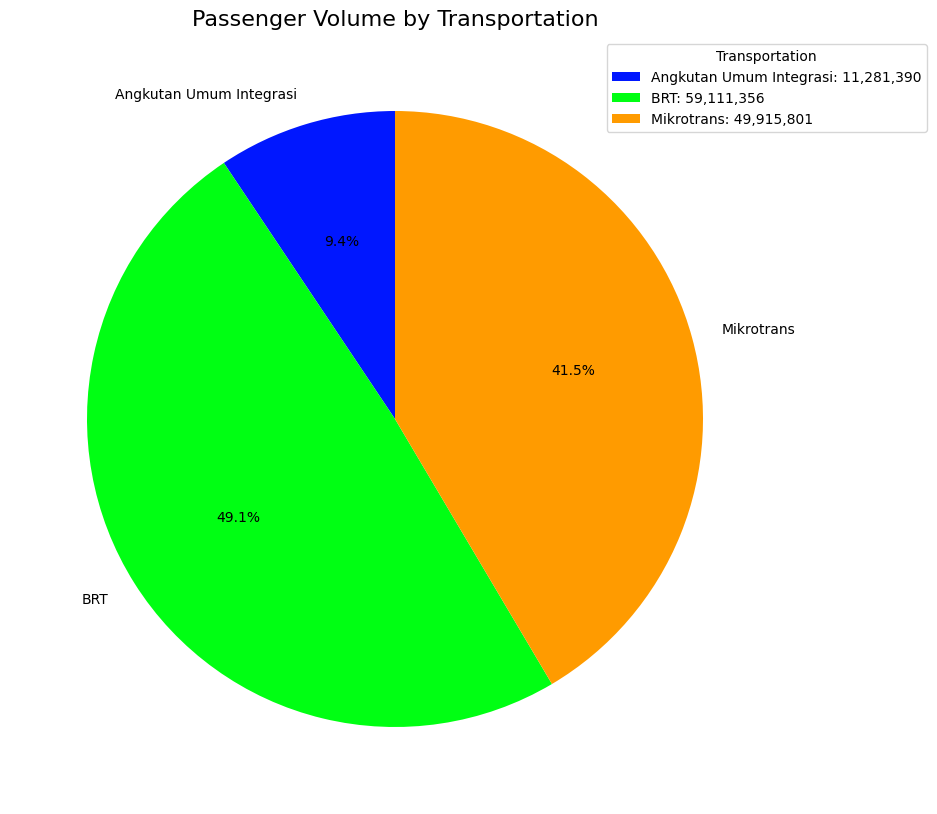

In [43]:
grouped_jenis = ds.groupby('jenis')['jumlah_penumpang'].sum()

highest_jenis = grouped_jenis.idxmax()

fig, ax = plt.subplots(figsize=(10, 10))
colors = ['#0017FF','#00FF13','#FF9B00']
ax.pie(grouped_jenis, labels=grouped_jenis.index, autopct='%1.1f%%', colors=colors, startangle=90)
ax.set_title('Passenger Volume by Transportation', fontsize=16)

legends = [f"{row[0]}: {row[1]:,.0f}" for row in grouped_jenis.iteritems()]

plt.legend(legends,
           loc='center right',
           bbox_to_anchor=(1.2, 0.93),
           fontsize=10,
           title = 'Transportation')

plt.show()

In [44]:
grouped = ds.groupby('trayek')['jumlah_penumpang'].sum().reset_index()
sorted_grouped = grouped.sort_values('jumlah_penumpang', ascending=False)
sorted_grouped.head()

,trayek,jumlah_penumpang
5,Blok M - Kota,10079752
75,Pinang Ranti - Pluit,7694406
34,Kalideres - Pasar Baru,5250726
59,Lebak Bulus - Harmoni,5122397
37,Kampung Melayu - Ancol,4902814


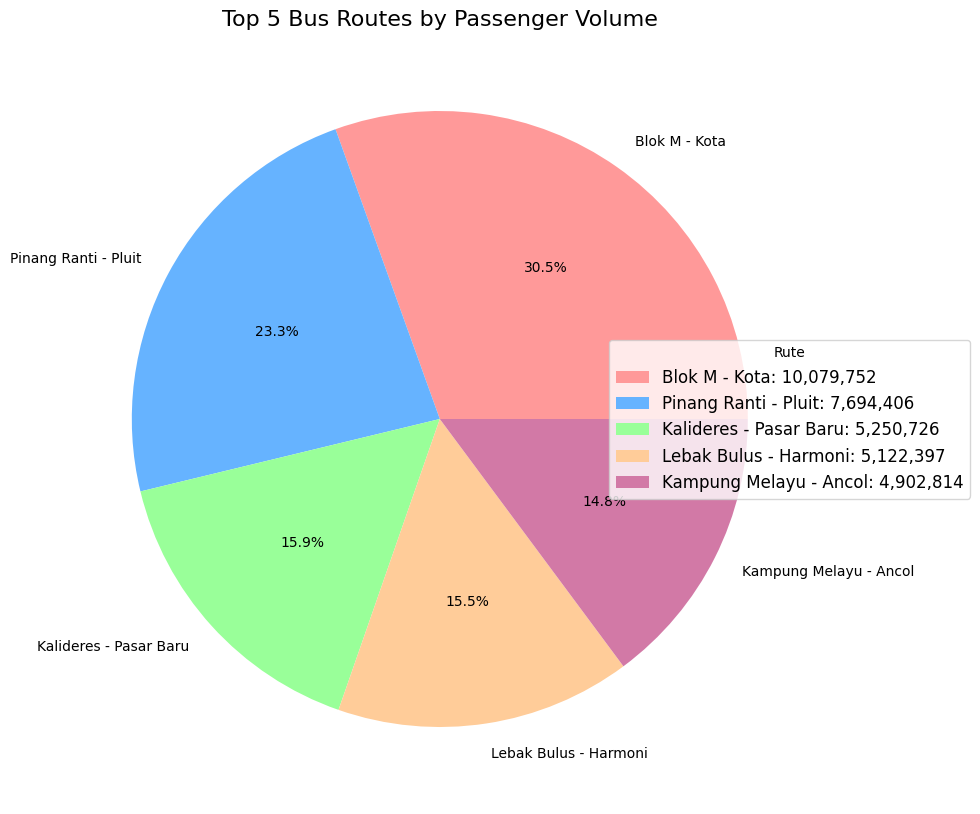

In [45]:
grouped = ds.groupby('trayek')['jumlah_penumpang'].sum().reset_index()
sorted_grouped = grouped.sort_values('jumlah_penumpang', ascending=False).reset_index(drop=True)

top_routes = sorted_grouped.head()

fig, ax = plt.subplots(figsize=(10, 10))
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#d279a6']

ax.pie(top_routes['jumlah_penumpang'],
       labels=top_routes['trayek'],
       autopct='%1.1f%%',
       colors=colors)

ax.set_title('Top 5 Bus Routes by Passenger Volume',
             fontsize=16)

legends = [f"{row['trayek']}: {row['jumlah_penumpang']:,.0f}" for index, row in top_routes.iterrows()]
plt.legend(legends,
           loc='center right',
           bbox_to_anchor=(1.2, 0.5),
           fontsize=12,
           title = 'Rute')
plt.show()

In [46]:
grouped = ds.groupby('trayek')['jumlah_penumpang'].sum().reset_index()
sorted_grouped = grouped.sort_values('jumlah_penumpang', ascending=True)
sorted_grouped.head()


,trayek,jumlah_penumpang
114,Taman Kota Intan - Museum Bahari,232
54,Kota Tua Explorer,376
108,Stasiun Manggarai - Ragunan,377
17,Dukuh Atas - Casablanca via Epicentrum Raya,608
89,Ragunan - Departemen Pertanian,1386


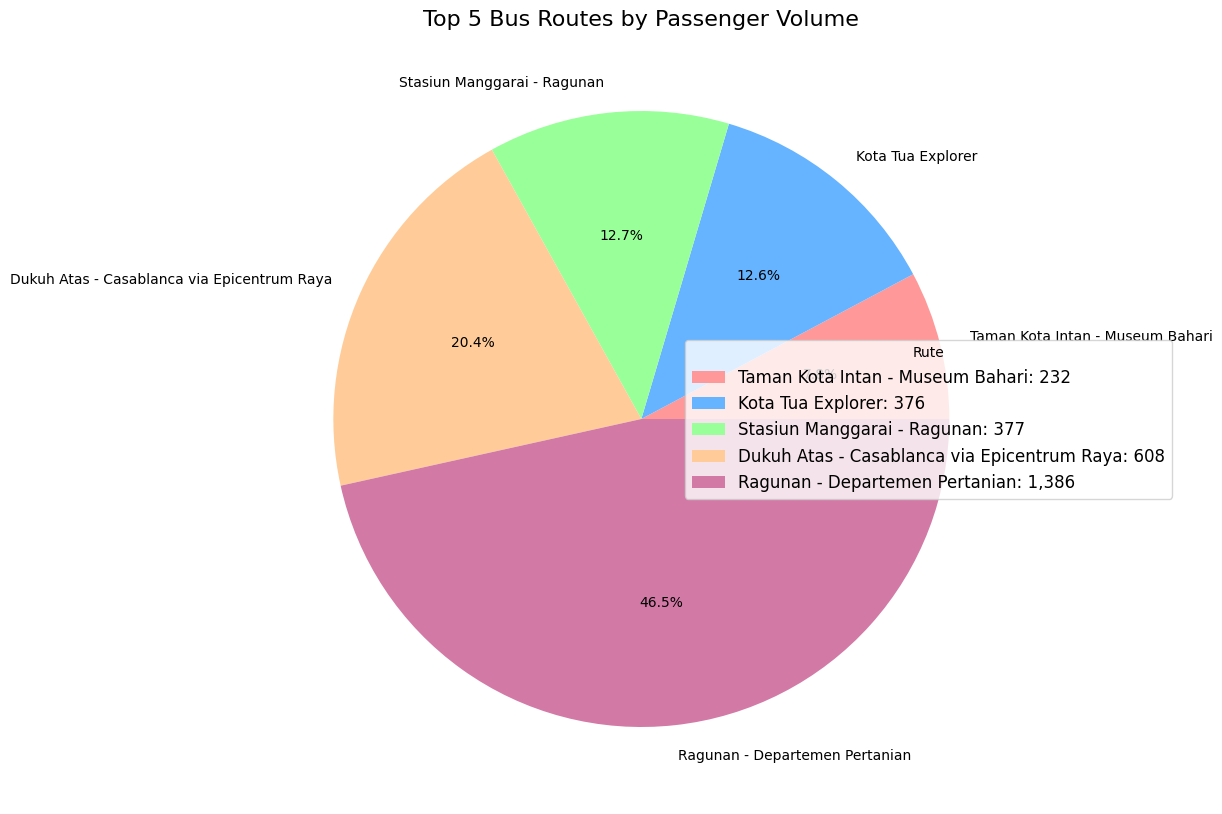

In [47]:
grouped = ds.groupby('trayek')['jumlah_penumpang'].sum().reset_index()
sorted_grouped = grouped.sort_values('jumlah_penumpang', ascending=True).reset_index(drop=True)

top_routes = sorted_grouped.head()

fig, ax = plt.subplots(figsize=(10, 10))
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#d279a6']

ax.pie(top_routes['jumlah_penumpang'],
       labels=top_routes['trayek'],
       autopct='%1.1f%%',
       colors=colors)

ax.set_title('Top 5 Bus Routes by Passenger Volume',
             fontsize=16)

legends = [f"{row['trayek']}: {row['jumlah_penumpang']:,.0f}" for index, row in top_routes.iterrows()]
plt.legend(legends,
           loc='center right',
           bbox_to_anchor=(1.2, 0.5),
           fontsize=12,
           title = 'Rute')
plt.show()

Kesimpulan
- rute dengan jumlah penumpang terbanyak adalah Blok M - Kota sebanyak 30,5% dari 5 besar rute dengan jumlah penumpang terbanyak
- rute dengan jumlah penumpang paling sedikit adalah Taman kota intan - museum bahari dengan hanya 232 penumpang
- Perusahaan diharapkan mengubah komposisi jumlah moda transportasi dengan menyesuaikan permintaan/jumlah penumpang pada setiap rutenya, dengan menempatkan moda transportasi terbanyak pada jalur blok M - Kota dan mengurangi jumlah transportasi jalur taman kota intan - museum, dimana perubahan komposisi moda transportasi ini dapat dilakukan dengan melakukan subsidi silang
